# Question 2

## Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [20]:
data = pd.read_csv('Question_2.csv')

data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


## Linear Regression

### Creating Windows of Data

In [22]:
window_size = 10  
features = []
labels = []

for i in range(len(data) - window_size):
    feature = data['Temp'][i:i+window_size]  
    label = data['Temp'][i+window_size]     
    features.append(feature)
    labels.append(label)

X = np.array(features)
y = np.array(labels)

print("Shape of feature set:", X.shape)
print("Shape of label set:", y.shape)

Shape of feature set: (3640, 10)
Shape of label set: (3640,)


### Split data into Train and Test

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

Shape of training set: (2912, 10)
Shape of testing set: (728, 10)


### Create a Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### Prediction

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Root Mean Squared Error: 2.411353522784154
Mean Absolute Error: 1.9076905202696846


### Plot the Prediction and Actual Data

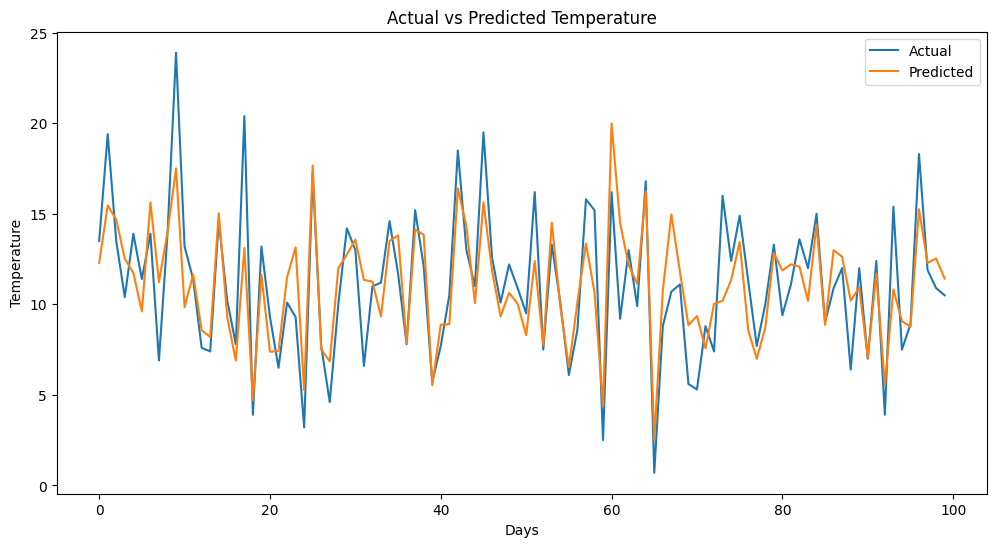

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.show()


## SVM

### Creating Data

In [27]:
window_size = 10  
features = []
labels = []

for i in range(len(data) - window_size):
    feature = data['Temp'][i:i+window_size] 
    if data['Temp'][i+window_size] < data['Temp'][i+window_size-1]:
        label = 0
    else:
        label = 1
    features.append(feature)
    labels.append(label)

X = np.array(features)
y = np.array(labels)

print("Shape of feature set:", X.shape)
print("Shape of label set:", y.shape)

Shape of feature set: (3640, 10)
Shape of label set: (3640,)


### Split data into Train and Test

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

Shape of training set: (2912, 10)
Shape of testing set: (728, 10)


### Create a SVM Model

In [29]:
from sklearn.svm import SVC

svm_classifier = SVC()

svm_classifier.fit(X_train, y_train)

SVC()

### Prediction

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.6387362637362637
Precision:  0.6342147435897436
Recall:  0.6328483073661413
F1 Score:  0.6332549902981057
